In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
#from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('new_train.csv')
test=pd.read_csv('new_test.csv')
sample_submission=pd.read_csv('new_sample_submission.csv')

In [3]:
train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
test.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,...,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,...,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,...,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,...,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,...,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [5]:
sample_submission.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.45,199.95,3091.65,993.15,1285.95
1,2011-08-05,473.05,196.40,3058.90,966.50,1242.05
2,2011-08-08,462.10,195.00,3080.70,950.90,1235.45
3,2011-08-09,464.45,199.75,3148.00,940.15,1205.20
4,2011-08-10,479.90,197.10,3154.85,963.70,1250.10


In [6]:
train.columns

Index(['Date', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2',
       'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2', 'VWAP-Stock-2',
       'Volume-Stock-2', 'Turnover-Stock-2', 'Open-Stock-3', 'High-Stock-3',
       'Low-Stock-3', 'Close-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3',
       'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4',
       'Close-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5',
       'VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5'],
      dtype='object')

In [7]:
train.corr()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Open-Stock-1,1.000000,0.998657,0.998349,0.996680,0.998020,-0.653797,0.152487,-0.244537,-0.245701,-0.246131,...,0.318391,0.086718,0.143728,0.305526,0.303020,0.286532,0.285655,0.294863,-0.039923,0.002674
High-Stock-1,0.998657,1.000000,0.998509,0.998663,0.999327,-0.643696,0.172032,-0.249227,-0.249736,-0.250530,...,0.318633,0.093216,0.150420,0.301533,0.302707,0.285265,0.287079,0.294644,-0.039103,0.003380
Low-Stock-1,0.998349,0.998509,1.000000,0.998852,0.999505,-0.657428,0.148761,-0.237313,-0.238026,-0.238193,...,0.311778,0.073807,0.129791,0.300193,0.298667,0.285815,0.285789,0.292959,-0.058478,-0.016128
Close-Stock-1,0.996680,0.998663,0.998852,1.000000,0.999487,-0.649227,0.163370,-0.241049,-0.241354,-0.241781,...,0.313433,0.080460,0.136901,0.296611,0.298319,0.284017,0.287596,0.292414,-0.055928,-0.013638
VWAP-Stock-1,0.998020,0.999327,0.999505,0.999487,1.000000,-0.649718,0.162981,-0.242452,-0.242983,-0.243351,...,0.314008,0.082052,0.138474,0.298097,0.298292,0.283747,0.285191,0.291949,-0.053067,-0.010975
Volume-Stock-1,-0.653797,-0.643696,-0.657428,-0.649227,-0.649718,1.000000,0.553294,-0.037683,-0.032467,-0.037560,...,0.026280,0.210258,0.212101,-0.057807,-0.030709,-0.050116,-0.036138,-0.039077,0.279705,0.273135
Turnover-Stock-1,0.152487,0.172032,0.148761,0.163370,0.162981,0.553294,1.000000,-0.188654,-0.183684,-0.191774,...,0.154501,0.470383,0.493271,0.114990,0.154685,0.106732,0.127822,0.132783,0.357536,0.377340
Open-Stock-2,-0.244537,-0.249227,-0.237313,-0.241049,-0.242452,-0.037683,-0.188654,1.000000,0.998343,0.999048,...,-0.684741,-0.128279,-0.243560,-0.253517,-0.277356,-0.233098,-0.250707,-0.257153,-0.049415,-0.080222
High-Stock-2,-0.245701,-0.249736,-0.238026,-0.241354,-0.242983,-0.032467,-0.183684,0.998343,1.000000,0.998468,...,-0.687411,-0.122530,-0.238710,-0.257495,-0.278819,-0.235825,-0.251734,-0.258926,-0.046225,-0.077223
Low-Stock-2,-0.246131,-0.250530,-0.238193,-0.241781,-0.243351,-0.037560,-0.191774,0.999048,0.998468,1.000000,...,-0.684159,-0.133024,-0.248194,-0.256961,-0.279913,-0.234614,-0.251611,-0.258878,-0.053946,-0.084986


In [8]:
train['Date'] = pd.to_datetime(train['Date'])

In [9]:
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year
train['day'] = train['Date'].dt.day
train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5,month,year,day
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,...,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000,6,2010,1
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,...,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000,6,2010,2
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,...,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000,6,2010,3
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,...,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000,6,2010,4
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,...,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000,6,2010,7


In [10]:
test['Date'] = pd.to_datetime(test['Date'])
test['month'] = test['Date'].dt.month
test['year'] = test['Date'].dt.year
test['day'] = test['Date'].dt.day
test.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5,month,year,day
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,...,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000,8,2011,4
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,...,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000,8,2011,5
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,...,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000,8,2011,8
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,...,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000,8,2011,9
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,...,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000,8,2011,10


In [11]:
df1=pd.DataFrame(train, 
                 columns = ["Open-Stock-1","High-Stock-1","Low-Stock-1","VWAP-Stock-1","Volume-Stock-1","Turnover-Stock-1","year","month","day"])
df_t1=pd.DataFrame(test, 
                 columns = ["Open-Stock-1","High-Stock-1","Low-Stock-1","VWAP-Stock-1","Volume-Stock-1","Turnover-Stock-1","year","month","day"])

df2=pd.DataFrame(train, 
                 columns = ["Open-Stock-2","High-Stock-2","Low-Stock-2","VWAP-Stock-2","Volume-Stock-2","Turnover-Stock-2","year","month","day"])
df_t2=pd.DataFrame(test, 
                 columns = ["Open-Stock-2","High-Stock-2","Low-Stock-2","VWAP-Stock-2","Volume-Stock-2","Turnover-Stock-2","year","month","day"])

df3=pd.DataFrame(train, 
                 columns = ["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3","Volume-Stock-3","Turnover-Stock-3","year","month","day"])
df_t3=pd.DataFrame(test, 
                 columns = ["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3","Volume-Stock-3","Turnover-Stock-3","year","month","day"])

df4=pd.DataFrame(train, 
                 columns = ["Open-Stock-4","High-Stock-4","Low-Stock-4","VWAP-Stock-4","Volume-Stock-4","Turnover-Stock-4","year","month","day"])
df_t4=pd.DataFrame(test, 
                 columns = ["Open-Stock-4","High-Stock-4","Low-Stock-4","VWAP-Stock-4","Volume-Stock-4","Turnover-Stock-4","year","month","day"])

df5=pd.DataFrame(train, 
                 columns = ["Open-Stock-5","High-Stock-5","Low-Stock-5","VWAP-Stock-5","Volume-Stock-5","Turnover-Stock-5","year","month","day"])
df_t5=pd.DataFrame(test, 
                 columns = ["Open-Stock-5","High-Stock-5","Low-Stock-5","VWAP-Stock-5","Volume-Stock-5","Turnover-Stock-5","year","month","day"])


In [12]:
target1=pd.DataFrame(train, columns = ["Close-Stock-1"])
target2=pd.DataFrame(train, columns = ["Close-Stock-2"])
target3=pd.DataFrame(train, columns = ["Close-Stock-3"])
target4=pd.DataFrame(train, columns = ["Close-Stock-4"])
target5=pd.DataFrame(train, columns = ["Close-Stock-5"])

In [13]:
df1.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,year,month,day
0,1889.7,1890.00,1838.00,1855.75,568273,105457457545000,2010,6,1
1,1848.0,1862.75,1828.00,1842.82,945167,174177161135000,2010,6,2
2,1864.1,1910.00,1864.10,1893.91,679689,128727119355000,2010,6,3
3,1906.0,1909.80,1880.10,1889.21,509435,96242800140000,2010,6,4
4,1867.0,1894.85,1808.35,1873.32,961913,180196832650000,2010,6,7


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df1[["Open-Stock-1","High-Stock-1","Low-Stock-1","VWAP-Stock-1","Volume-Stock-1","Turnover-Stock-1","year","month","day"]] = scaler.fit_transform(df1[["Open-Stock-1","High-Stock-1","Low-Stock-1","VWAP-Stock-1","Volume-Stock-1","Turnover-Stock-1","year","month","day"]])
df1.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,year,month,day
0,0.675993,0.669132,0.655533,0.657724,0.099529,0.204381,0.0,0.454545,0.000000
1,0.656015,0.656128,0.650720,0.651534,0.170437,0.350606,0.0,0.454545,0.033333
2,0.663728,0.678677,0.668095,0.675993,0.120490,0.253896,0.0,0.454545,0.066667
3,0.683802,0.678582,0.675795,0.673742,0.088459,0.184774,0.0,0.454545,0.100000
4,0.665118,0.671447,0.641262,0.666135,0.173588,0.363415,0.0,0.454545,0.200000


In [20]:
df2[["Open-Stock-2","High-Stock-2","Low-Stock-2","VWAP-Stock-2","Volume-Stock-2","Turnover-Stock-2","year","month","day"]] = scaler.fit_transform(df2[["Open-Stock-2","High-Stock-2","Low-Stock-2","VWAP-Stock-2","Volume-Stock-2","Turnover-Stock-2","year","month","day"]])
df2.head()

,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,year,month,day
0,0.845151,0.825508,0.828125,0.824170,0.070992,0.146915,0.0,0.454545,0.000000
1,0.836248,0.818211,0.814063,0.807469,0.054321,0.116709,0.0,0.454545,0.033333
2,0.829889,0.831218,0.834375,0.834303,0.046959,0.106377,0.0,0.454545,0.066667
3,0.867091,0.862627,0.800000,0.862263,0.070891,0.150773,0.0,0.454545,0.100000
4,0.842607,0.845495,0.850000,0.844749,0.036999,0.089895,0.0,0.454545,0.200000


In [21]:
df3[["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3","Volume-Stock-3","Turnover-Stock-3","year","month","day"]] = scaler.fit_transform(df3[["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3","Volume-Stock-3","Turnover-Stock-3","year","month","day"]])
df3.head()

,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,year,month,day
0,0.026217,0.000000,0.017453,0.023272,0.033137,0.021156,0.0,0.454545,0.000000
1,0.000000,0.000155,0.000000,0.000000,0.025085,0.015530,0.0,0.454545,0.033333
2,0.054739,0.026140,0.053984,0.038209,0.024861,0.015838,0.0,0.454545,0.066667
3,0.041768,0.045144,0.057515,0.067878,0.010997,0.006736,0.0,0.454545,0.100000
4,0.055404,0.086255,0.070604,0.095681,0.037631,0.025374,0.0,0.454545,0.200000


In [22]:
df4[["Open-Stock-4","High-Stock-4","Low-Stock-4","VWAP-Stock-4","Volume-Stock-4","Turnover-Stock-4","year","month","day"]] = scaler.fit_transform(df4[["Open-Stock-4","High-Stock-4","Low-Stock-4","VWAP-Stock-4","Volume-Stock-4","Turnover-Stock-4","year","month","day"]])
df4.head()

,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,year,month,day
0,0.248930,0.068795,0.217278,0.046576,0.307041,0.223397,0.0,0.454545,0.000000
1,0.236542,0.035297,0.199157,0.032954,0.257531,0.183320,0.0,0.454545,0.033333
2,0.248485,0.055868,0.244371,0.066730,0.184072,0.129831,0.0,0.454545,0.066667
3,0.253298,0.077338,0.254956,0.087485,0.225793,0.164811,0.0,0.454545,0.100000
4,0.000000,0.035522,0.000000,0.036465,0.270907,0.194071,0.0,0.454545,0.200000


In [23]:
df5[["Open-Stock-5","High-Stock-5","Low-Stock-5","VWAP-Stock-5","Volume-Stock-5","Turnover-Stock-5","year","month","day"]] = scaler.fit_transform(df5[["Open-Stock-5","High-Stock-5","Low-Stock-5","VWAP-Stock-5","Volume-Stock-5","Turnover-Stock-5","year","month","day"]])
df5.head()

,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5,year,month,day
0,0.179768,0.104423,0.064118,0.065582,0.340687,0.282565,0.0,0.454545,0.000000
1,0.088631,0.029369,0.043933,0.047810,0.245472,0.201227,0.0,0.454545,0.033333
2,0.125085,0.128596,0.144859,0.147836,0.280383,0.239014,0.0,0.454545,0.066667
3,0.191160,0.152768,0.213726,0.191166,0.274722,0.237795,0.0,0.454545,0.100000
4,0.142401,0.073000,0.109238,0.094278,0.268782,0.224544,0.0,0.454545,0.200000


In [24]:
df1.skew()

Open-Stock-1       -3.147039
High-Stock-1       -3.176070
Low-Stock-1        -3.156502
VWAP-Stock-1       -3.176146
Volume-Stock-1      3.182177
Turnover-Stock-1    1.352826
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

In [25]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return (lower_range,upper_range)

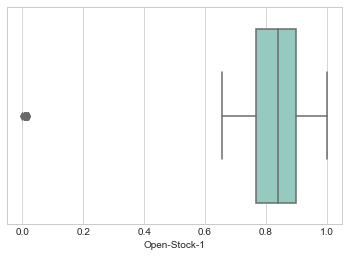

In [26]:
sns.boxplot(df1['Open-Stock-1'],palette = "Set3")

In [27]:
len(df1)

299

In [28]:
df1.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,year,month,day
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.797711,0.802170,0.790284,0.795323,0.159827,0.351327,0.494983,0.507145,0.485396
std,0.196857,0.198153,0.195389,0.196418,0.113040,0.175047,0.500813,0.288294,0.297326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.766780,0.774172,0.758904,0.766645,0.095822,0.222866,0.000000,0.272727,0.233333
50%,0.839026,0.848048,0.832266,0.835284,0.131223,0.317116,0.000000,0.545455,0.466667
75%,0.898865,0.902978,0.891972,0.896776,0.182994,0.425687,1.000000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


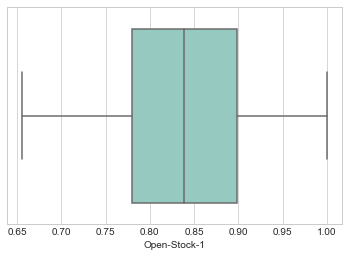

In [29]:
lowerbound,upperbound = outlier_treatment(df1['Open-Stock-1'])
median = df1['Open-Stock-1'].median()
df1['Open-Stock-1'] = np.where(df1['Open-Stock-1'] > upperbound, median,df1['Open-Stock-1'])
df1['Open-Stock-1'] = np.where(df1['Open-Stock-1'] < lowerbound, median,df1['Open-Stock-1'])
sns.boxplot(df1['Open-Stock-1'],palette = "Set3")

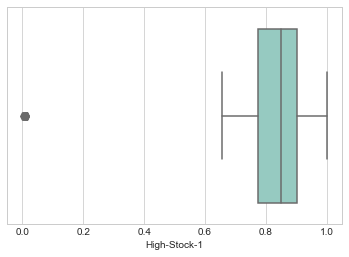

In [30]:
sns.boxplot(df1['High-Stock-1'],palette = "Set3")

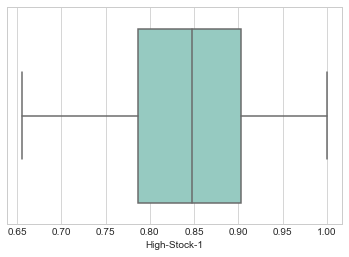

In [31]:
lowerbound,upperbound = outlier_treatment(df1['High-Stock-1'])
median = df1['High-Stock-1'].median()
df1['High-Stock-1'] = np.where(df1['High-Stock-1'] > upperbound, median,df1['High-Stock-1'])
df1['High-Stock-1'] = np.where(df1['High-Stock-1'] < lowerbound, median,df1['High-Stock-1'])
sns.boxplot(df1['High-Stock-1'],palette = "Set3")

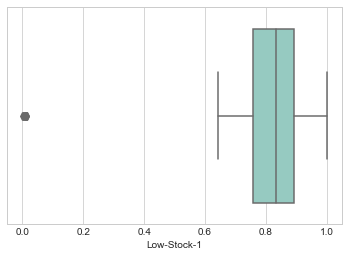

In [32]:
sns.boxplot(df1['Low-Stock-1'],palette = "Set3")

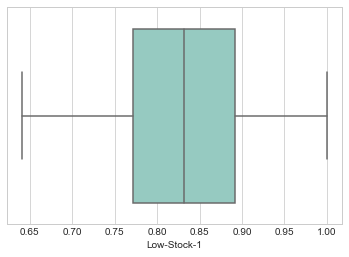

In [33]:
lowerbound,upperbound = outlier_treatment(df1['Low-Stock-1'])
median = df1['Low-Stock-1'].median()
df1['Low-Stock-1'] = np.where(df1['Low-Stock-1'] > upperbound, median,df1['Low-Stock-1'])
df1['Low-Stock-1'] = np.where(df1['Low-Stock-1'] < lowerbound, median,df1['Low-Stock-1'])
sns.boxplot(df1['Low-Stock-1'],palette = "Set3")

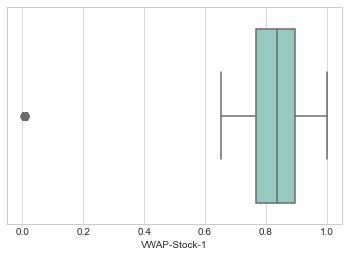

In [34]:
sns.boxplot(df1['VWAP-Stock-1'],palette = "Set3")

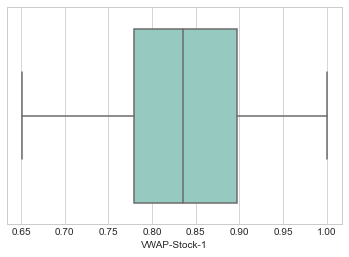

In [35]:
VWAPerbound,upperbound = outlier_treatment(df1['VWAP-Stock-1'])
median = df1['VWAP-Stock-1'].median()
df1['VWAP-Stock-1'] = np.where(df1['VWAP-Stock-1'] > upperbound, median,df1['VWAP-Stock-1'])
df1['VWAP-Stock-1'] = np.where(df1['VWAP-Stock-1'] < VWAPerbound, median,df1['VWAP-Stock-1'])
sns.boxplot(df1['VWAP-Stock-1'],palette = "Set3")

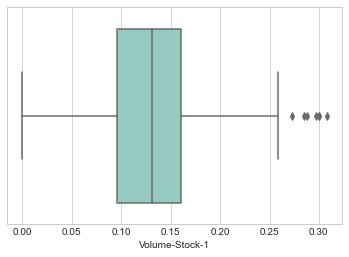

In [36]:
lowerbound,upperbound = outlier_treatment(df1['Volume-Stock-1'])
median = df1['Volume-Stock-1'].median()
df1['Volume-Stock-1'] = np.where(df1['Volume-Stock-1'] > upperbound, median,df1['Volume-Stock-1'])
df1['Volume-Stock-1'] = np.where(df1['Volume-Stock-1'] < lowerbound, median,df1['Volume-Stock-1'])
sns.boxplot(df1['Volume-Stock-1'],palette = "Set3")

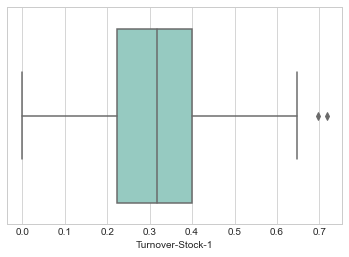

In [37]:
lowerbound,upperbound = outlier_treatment(df1['Turnover-Stock-1'])
median = df1['Turnover-Stock-1'].median()
df1['Turnover-Stock-1'] = np.where(df1['Turnover-Stock-1'] > upperbound, median,df1['Turnover-Stock-1'])
df1['Turnover-Stock-1'] = np.where(df1['Turnover-Stock-1'] < lowerbound, median,df1['Turnover-Stock-1'])
sns.boxplot(df1['Turnover-Stock-1'],palette = "Set3")

In [38]:
df1.skew()

Open-Stock-1       -0.270948
High-Stock-1       -0.338203
Low-Stock-1        -0.265131
VWAP-Stock-1       -0.292210
Volume-Stock-1      0.798953
Turnover-Stock-1    0.584953
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

In [39]:
len(df1)

299

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,target1,test_size=0.2,random_state=42)
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [41]:
pred = regr.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))
pred = regr.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 93.17499207019655
RMSE test: 106.62861280940439


In [42]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)

pred = svm_reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = svm_reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 443.373675703783
RMSE test: 274.09007049426555


In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

pred = reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 288.87827127097245
RMSE test: 243.3185539887754


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(random_state = 0)
reg_grad.fit(x_train,y_train)

pred = reg_grad.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg_grad.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 6.586485709467442
RMSE test: 49.09580853548589


In [45]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=6)
regn.fit(x_train,y_train)

pred = regn.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = regn.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 210.67562755964977
RMSE test: 128.81785562662014


In [46]:
pr_1 = reg_grad.predict(df_t1) #1st target value

In [47]:
df2.skew()

Open-Stock-2        1.670250
High-Stock-2        1.664292
Low-Stock-2         1.666840
VWAP-Stock-2        1.664128
Volume-Stock-2      2.375246
Turnover-Stock-2    2.314755
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

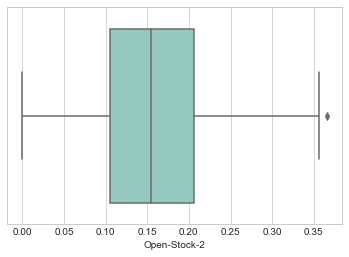

In [48]:
lowerbound,upperbound = outlier_treatment(df2['Open-Stock-2'])
median = df2['Open-Stock-2'].median()
df2['Open-Stock-2'] = np.where(df2['Open-Stock-2'] > upperbound, median,df2['Open-Stock-2'])
df2['Open-Stock-2'] = np.where(df2['Open-Stock-2'] < lowerbound, median,df2['Open-Stock-2'])
sns.boxplot(df2['Open-Stock-2'],palette = "Set3")

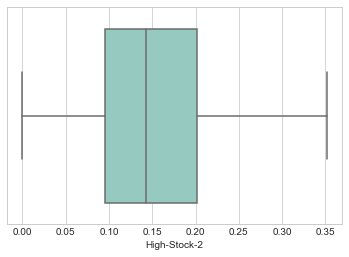

In [49]:
lowerbound,upperbound = outlier_treatment(df2['High-Stock-2'])
median = df2['High-Stock-2'].median()
df2['High-Stock-2'] = np.where(df2['High-Stock-2'] > upperbound, median,df2['High-Stock-2'])
df2['High-Stock-2'] = np.where(df2['High-Stock-2'] < lowerbound, median,df2['High-Stock-2'])
sns.boxplot(df2['High-Stock-2'],palette = "Set3")

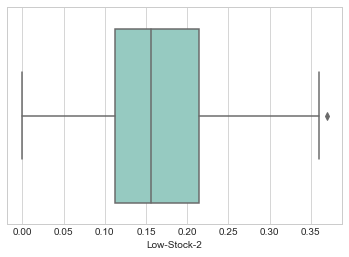

In [50]:
lowerbound,upperbound = outlier_treatment(df2['Low-Stock-2'])
median = df2['Low-Stock-2'].median()
df2['Low-Stock-2'] = np.where(df2['Low-Stock-2'] > upperbound, median,df2['Low-Stock-2'])
df2['Low-Stock-2'] = np.where(df2['Low-Stock-2'] < lowerbound, median,df2['Low-Stock-2'])
sns.boxplot(df2['Low-Stock-2'],palette = "Set3")

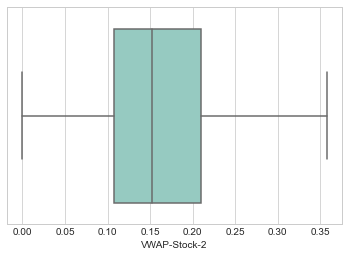

In [51]:
lowerbound,upperbound = outlier_treatment(df2['VWAP-Stock-2'])
median = df2['VWAP-Stock-2'].median()
df2['VWAP-Stock-2'] = np.where(df2['VWAP-Stock-2'] > upperbound, median,df2['VWAP-Stock-2'])
df2['VWAP-Stock-2'] = np.where(df2['VWAP-Stock-2'] < lowerbound, median,df2['VWAP-Stock-2'])
sns.boxplot(df2['VWAP-Stock-2'],palette = "Set3")

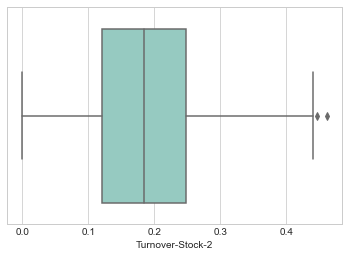

In [52]:
lowerbound,upperbound = outlier_treatment(df2['Turnover-Stock-2'])
median = df2['Turnover-Stock-2'].median()
df2['Turnover-Stock-2'] = np.where(df2['Turnover-Stock-2'] > upperbound, median,df2['Turnover-Stock-2'])
df2['Turnover-Stock-2'] = np.where(df2['Turnover-Stock-2'] < lowerbound, median,df2['Turnover-Stock-2'])
sns.boxplot(df2['Turnover-Stock-2'],palette = "Set3")

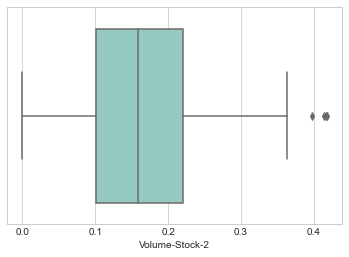

In [53]:
lowerbound,upperbound = outlier_treatment(df2['Volume-Stock-2'])
median = df2['Volume-Stock-2'].median()
df2['Volume-Stock-2'] = np.where(df2['Volume-Stock-2'] > upperbound, median,df2['Volume-Stock-2'])
df2['Volume-Stock-2'] = np.where(df2['Volume-Stock-2'] < lowerbound, median,df2['Volume-Stock-2'])
sns.boxplot(df2['Volume-Stock-2'],palette = "Set3")

In [54]:
x_train,x_test,y_train,y_test = train_test_split(df2,target2,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train,y_train)

pred = regr.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))
pred = regr.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 4.496064353690402
RMSE test: 11.117907414443112


In [55]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)

pred = svm_reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = svm_reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 45.94384274314585
RMSE test: 42.8219943048246


In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

pred = reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 20.01510365329423
RMSE test: 19.479737843419404


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(random_state = 0)
reg_grad.fit(x_train,y_train)

pred = reg_grad.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg_grad.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 0.9978105246069914
RMSE test: 12.699573504111578


In [58]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=2)
regn.fit(x_train,y_train)

pred = regn.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = regn.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 6.173193330811987
RMSE test: 2.580148574533385


In [59]:
pr_2 = regn.predict(df_t2)  #target2

In [60]:
df3.skew()

Open-Stock-3        0.293695
High-Stock-3        0.324817
Low-Stock-3         0.314537
VWAP-Stock-3        0.330278
Volume-Stock-3      8.520456
Turnover-Stock-3    9.646605
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

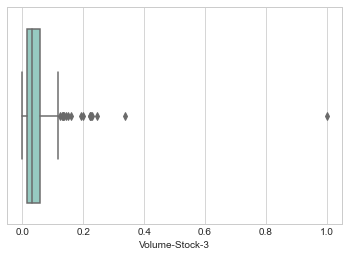

In [61]:
sns.boxplot(df3['Volume-Stock-3'],palette = "Set3")

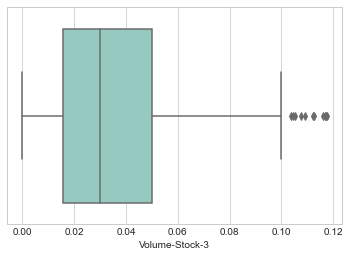

In [62]:
lowerbound,upperbound = outlier_treatment(df3['Volume-Stock-3'])
median = df3['Volume-Stock-3'].median()
df3['Volume-Stock-3'] = np.where(df3['Volume-Stock-3'] > upperbound, median,df3['Volume-Stock-3'])
df3['Volume-Stock-3'] = np.where(df3['Volume-Stock-3'] < lowerbound, median,df3['Volume-Stock-3'])
sns.boxplot(df3['Volume-Stock-3'],palette = "Set3")

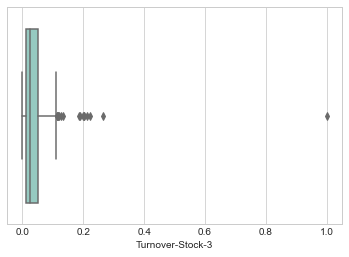

In [63]:
sns.boxplot(df3['Turnover-Stock-3'],palette = "Set3")

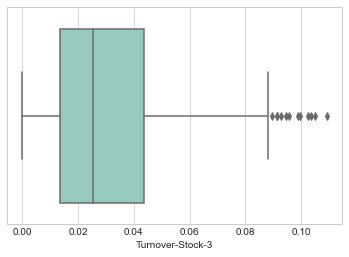

In [64]:
lowerbound,upperbound = outlier_treatment(df3['Turnover-Stock-3'])
median = df3['Turnover-Stock-3'].median()
df3['Turnover-Stock-3'] = np.where(df3['Turnover-Stock-3'] > upperbound, median,df3['Turnover-Stock-3'])
df3['Turnover-Stock-3'] = np.where(df3['Turnover-Stock-3'] < lowerbound, median,df3['Turnover-Stock-3'])
sns.boxplot(df3['Turnover-Stock-3'],palette = "Set3")

In [65]:
df3.skew()

Open-Stock-3        0.293695
High-Stock-3        0.324817
Low-Stock-3         0.314537
VWAP-Stock-3        0.330278
Volume-Stock-3      1.089089
Turnover-Stock-3    1.115532
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

In [66]:
x_train,x_test,y_train,y_test = train_test_split(df3,target3,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(x_train,y_train)

pred = regr.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))
pred = regr.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 27.908286077443858
RMSE test: 35.97036546119344


In [67]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)

pred = svm_reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = svm_reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 226.76164648650587
RMSE test: 223.60449359175655


In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

pred = reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 14.879567126788835
RMSE test: 17.66158826473145


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(random_state = 0)
reg_grad.fit(x_train,y_train)

pred = reg_grad.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg_grad.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 6.181189462656108
RMSE test: 19.74608877565979


In [70]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=6)
regn.fit(x_train,y_train)

pred = regn.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = regn.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 30.420725169140272
RMSE test: 36.38970808026174


In [71]:
pr_3 = reg_grad.predict(df_t3) #target 3

In [72]:
df4.skew()

Open-Stock-4       -0.415685
High-Stock-4       -0.380276
Low-Stock-4        -0.411978
VWAP-Stock-4       -0.369286
Volume-Stock-4      1.528790
Turnover-Stock-4    1.577583
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

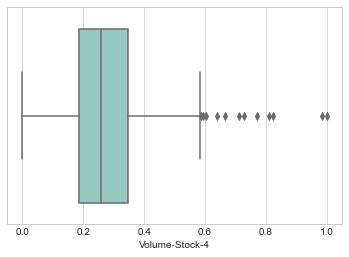

In [73]:
sns.boxplot(df4['Volume-Stock-4'],palette = "Set3")

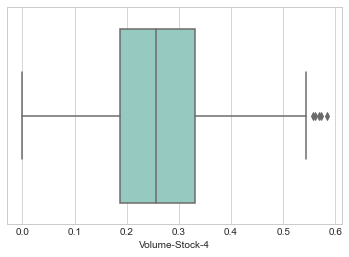

In [74]:
lowerbound,upperbound = outlier_treatment(df4['Volume-Stock-4'])
median = df4['Volume-Stock-4'].median()
df4['Volume-Stock-4'] = np.where(df4['Volume-Stock-4'] > upperbound, median,df4['Volume-Stock-4'])
df4['Volume-Stock-4'] = np.where(df4['Volume-Stock-4'] < lowerbound, median,df4['Volume-Stock-4'])
sns.boxplot(df4['Volume-Stock-4'],palette = "Set3")

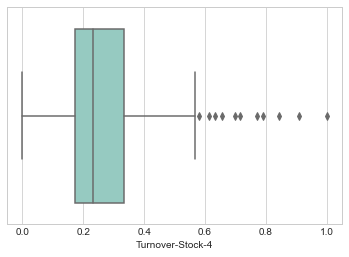

In [75]:
sns.boxplot(df4['Turnover-Stock-4'],palette = "Set3")

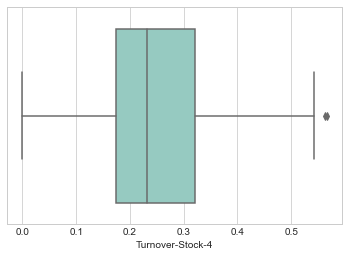

In [76]:
lowerbound,upperbound = outlier_treatment(df4['Turnover-Stock-4'])
median = df4['Turnover-Stock-4'].median()
df4['Turnover-Stock-4'] = np.where(df4['Turnover-Stock-4'] > upperbound, median,df4['Turnover-Stock-4'])
df4['Turnover-Stock-4'] = np.where(df4['Turnover-Stock-4'] < lowerbound, median,df4['Turnover-Stock-4'])
sns.boxplot(df4['Turnover-Stock-4'],palette = "Set3")

In [77]:
x_train,x_test,y_train,y_test = train_test_split(df4,target4,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(x_train,y_train)

pred = regr.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))
pred = regr.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 12.129369361377861
RMSE test: 14.43645043328579


In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

pred = reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 6.552589025060905
RMSE test: 6.202291441996053


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(random_state = 0)
reg_grad.fit(x_train,y_train)

pred = reg_grad.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg_grad.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 3.136129380752028
RMSE test: 10.158419734777858


In [80]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=2)
regn.fit(x_train,y_train)

pred = regn.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = regn.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 10.837462146372586
RMSE test: 14.02296479588629


In [81]:
pr_4 = reg_grad.predict(df_t4) #target 4

In [82]:
df5.skew()

Open-Stock-5        0.811638
High-Stock-5        0.835026
Low-Stock-5         0.826147
VWAP-Stock-5        0.835811
Volume-Stock-5      1.680499
Turnover-Stock-5    1.746683
year                0.020169
month              -0.028484
day                 0.015460
dtype: float64

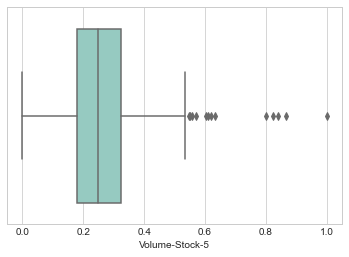

In [83]:
sns.boxplot(df5['Volume-Stock-5'],palette = "Set3")

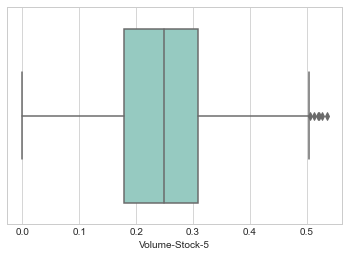

In [84]:
lowerbound,upperbound = outlier_treatment(df5['Volume-Stock-5'])
median = df5['Volume-Stock-5'].median()
df5['Volume-Stock-5'] = np.where(df5['Volume-Stock-5'] > upperbound, median,df5['Volume-Stock-5'])
df5['Volume-Stock-5'] = np.where(df5['Volume-Stock-5'] < lowerbound, median,df5['Volume-Stock-5'])
sns.boxplot(df5['Volume-Stock-5'],palette = "Set3")

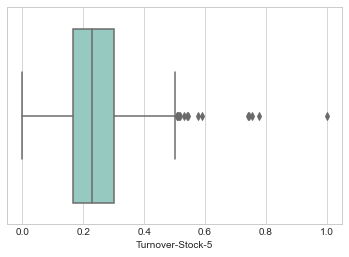

In [85]:
sns.boxplot(df5['Turnover-Stock-5'],palette = "Set3")

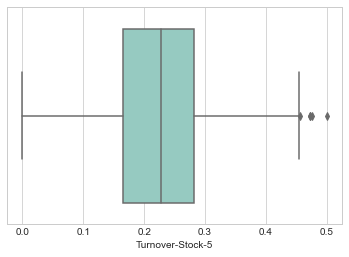

In [86]:
lowerbound,upperbound = outlier_treatment(df5['Turnover-Stock-5'])
median = df5['Turnover-Stock-5'].median()
df5['Turnover-Stock-5'] = np.where(df5['Turnover-Stock-5'] > upperbound, median,df5['Turnover-Stock-5'])
df5['Turnover-Stock-5'] = np.where(df5['Turnover-Stock-5'] < lowerbound, median,df5['Turnover-Stock-5'])
sns.boxplot(df5['Turnover-Stock-5'],palette = "Set3")

In [87]:
x_train,x_test,y_train,y_test = train_test_split(df5,target5,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(x_train,y_train)

pred = regr.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))
pred = regr.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 11.545214255601183
RMSE test: 15.717831735291


In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

pred = reg.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 8.36026476373795
RMSE test: 7.619311303653835


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor()
reg_grad.fit(x_train,y_train)

pred = reg_grad.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = reg_grad.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test) 

RMSE train: 3.4360951511837152
RMSE test: 10.86726322121784


In [90]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=2)
regn.fit(x_train,y_train)

pred = regn.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred))

pred = regn.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred))

print("RMSE train: %s" % rmse_train) 
print("RMSE test: %s" % rmse_test)

RMSE train: 12.076150681072447
RMSE test: 16.796012361569655


In [91]:
pr_5 = regn.predict(df_t5)

In [92]:
sample_submission.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.45,199.95,3091.65,993.15,1285.95
1,2011-08-05,473.05,196.40,3058.90,966.50,1242.05
2,2011-08-08,462.10,195.00,3080.70,950.90,1235.45
3,2011-08-09,464.45,199.75,3148.00,940.15,1205.20
4,2011-08-10,479.90,197.10,3154.85,963.70,1250.10


In [93]:
submission = pd.DataFrame(test, columns=['Date'])

In [94]:
submission['Close-Stock-1'] = pr_1
submission['Close-Stock-2'] = pr_2
submission['Close-Stock-3'] = pr_3
submission['Close-Stock-4'] = pr_4
submission['Close-Stock-5'] = pr_5

In [95]:
submission.head(10)

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,2557.567071,174.275,3277.87083,1269.171758,1358.6
1,2011-08-05,2557.567071,174.275,3277.87083,1269.171758,1266.4
2,2011-08-08,2557.567071,174.275,3277.87083,1269.171758,1358.6
3,2011-08-09,2557.567071,174.275,3277.87083,1269.171758,1266.4
4,2011-08-10,2557.567071,174.275,3277.87083,1269.171758,1358.6
5,2011-08-11,2557.567071,189.800,3277.87083,1269.171758,1358.6
6,2011-08-12,2557.567071,174.275,3277.87083,1269.171758,1358.6
7,2011-08-16,2557.567071,189.800,3277.87083,1269.171758,1358.6
8,2011-08-17,2557.567071,174.275,3277.87083,1269.171758,1358.6
9,2011-08-18,2557.567071,174.275,3277.87083,1269.171758,1266.4


In [96]:
submission.describe()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
count,9.700000e+01,97.000000,9.700000e+01,9.700000e+01,97.000000
mean,2.557567e+03,182.917784,3.277871e+03,1.269172e+03,1334.444330
std,9.142194e-13,7.752490,7.313755e-12,9.142194e-13,40.477081
min,2.557567e+03,174.275000,3.277871e+03,1.269172e+03,1260.600000
25%,2.557567e+03,174.275000,3.277871e+03,1.269172e+03,1266.400000
50%,2.557567e+03,189.800000,3.277871e+03,1.269172e+03,1358.600000
75%,2.557567e+03,189.800000,3.277871e+03,1.269172e+03,1358.600000
max,2.557567e+03,189.800000,3.277871e+03,1.269172e+03,1358.600000


In [97]:
submission.to_csv('C:/Users/Asus/OneDrive/Desktop/hiring challenge/submission_stock.csv',index = False)
print("submission is ready")

submission is ready


In [98]:
submission_check=pd.read_csv('C:/Users/Asus/OneDrive/Desktop/hiring challenge/submission_stock.csv')

In [99]:
submission_check.shape

(97, 6)